## Cadences Network Visualization with Louvain Communities

####  What Can You Do with this Notebook?

- This notebook helps you find a 'network' of cadences, either in one piece or several
- Display them as a graph, with 'pathways' showing the progress of one cadence to the nex
- For one piece or a corpus of them at once.

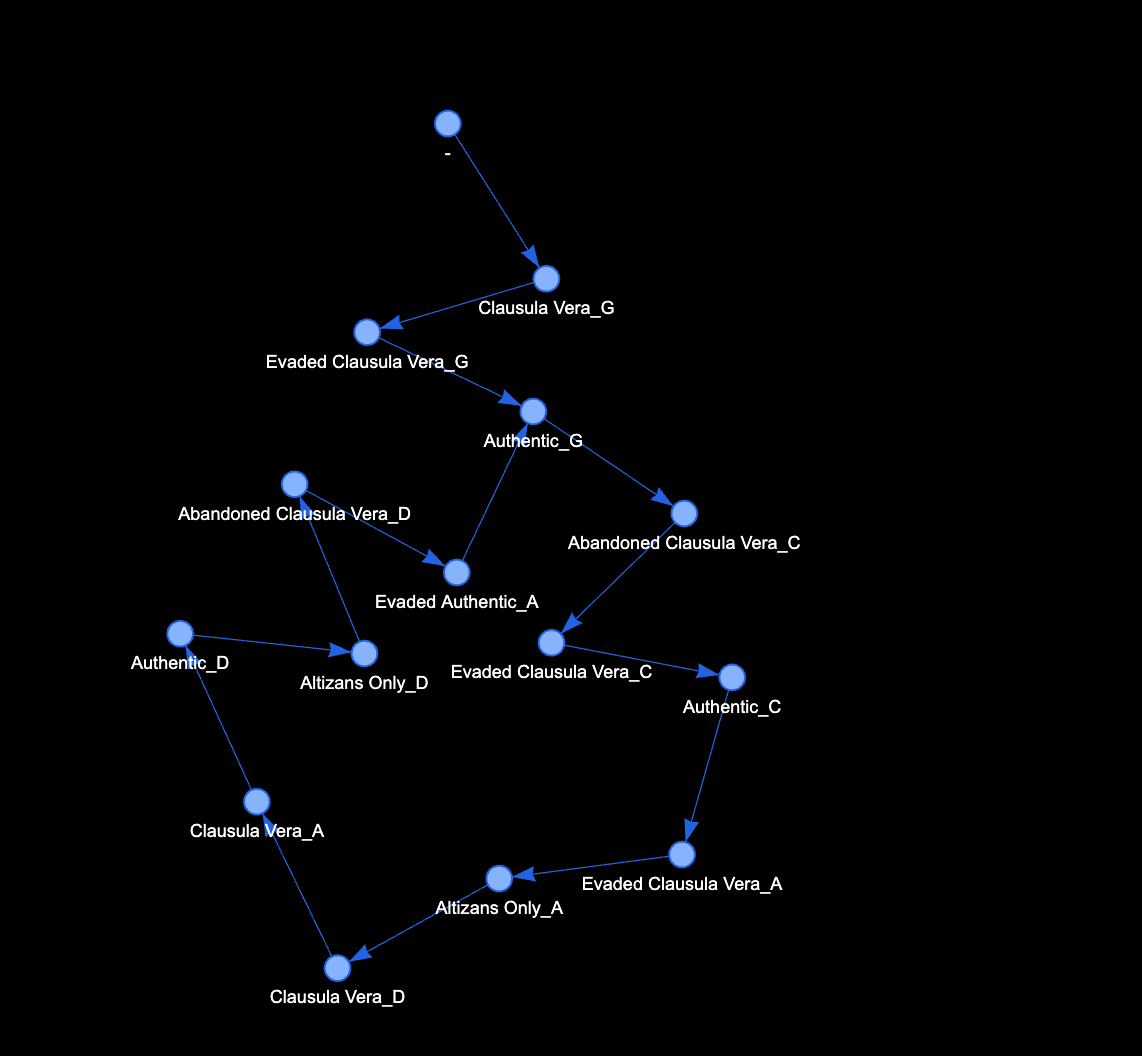

In [1]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt 
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests
import os
import numpy as np
import itertools
from itertools import combinations
import networkx as nx
from community import community_louvain
from copy import deepcopy
MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)

else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


# B.  Select Corpus

* The **CorpusBase** class is a convenient way to find patterns in any given list of pieces.
* The pieces are provided as a **list**, within square brackets and separated by commas.  
* The bracketed list is then contained within the parentheses of `CorpusBase()`
* For example: 

`prefix = 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/'`

`piece_list = ['CRIM_Model_0019',
             'CRIM_Mass_0019_1',
             'CRIM_Mass_0019_2',
             'CRIM_Mass_0019_3',
             'CRIM_Mass_0019_4',
             'CRIM_Mass_0019_5']`

`suffix = '.mei'`

Then build the corpus_list and import as CorpusBase:

`corpus_list  = []`<br>
`for piece in piece_list:`<br>
>    `url = prefix + piece + suffix`<br>
>   `corpus_list.append(url)`<br>

`corpus = CorpusBase(corpus_list)` <br> 

       
* Read the documentation:  `print(CorpusBase.batch.__doc__)`


In [2]:
prefix = 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/'

piece_list = ['CRIM_Model_0019', 'CRIM_Mass_0019_1']
#              'CRIM_Mass_0019_2',
#              'CRIM_Mass_0019_3',
#              'CRIM_Mass_0019_4',
#              'CRIM_Mass_0019_5']

suffix = '.mei'


In [3]:
corpus_list  =[]
for piece in piece_list:
    url = prefix + piece + suffix
    corpus_list.append(url)

corpus = CorpusBase(corpus_list) 

Successfully imported https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Model_0019.mei
Successfully imported https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0019_1.mei


### Now Run the Cadence Method on the Corpus

In [4]:


list_of_dfs = corpus.batch(ImportedPiece.cadences, metadata=True)
combined_df = pd.concat(list_of_dfs, ignore_index=True)
combined_df.dropna(inplace=True)
combined_df['all_features'] = combined_df['CadType'] + "_" + combined_df['Tone']  + "_" + combined_df['Beat'].apply(str)
combined_df['some_features'] = combined_df['CadType'] + "_" + combined_df['Tone']
combined_df.copy
combined_df["previous_all_feat"] = combined_df.groupby("Title")['all_features'].shift(1)
combined_df["previous_some_feat"] = combined_df.groupby("Title")['some_features'].shift(1)
combined_df

,CadType,LeadingTones,CVFs,Low,RelLow,Tone,RelTone,TSig,Measure,Beat,Sounding,Progress,SinceLast,ToNext,Composer,Title,all_features,some_features,previous_all_feat,previous_some_feat
0,Clausula Vera,1.0,TCu,G3,P1,G,P8,4/2,7,1.0,4,0.090909,48.0,36.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Clausula Vera_G_1.0,Clausula Vera_G,NaN,NaN
1,Evaded Clausula Vera,1.0,tC,G3,P1,G,P8,4/2,11,3.0,3,0.159091,36.0,68.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Evaded Clausula Vera_G_3.0,Evaded Clausula Vera_G,Clausula Vera_G_1.0,Clausula Vera_G
2,Authentic,1.0,TCB,G3,P1,G,P8,4/2,20,1.0,4,0.287879,68.0,72.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Authentic_G_1.0,Authentic_G,Evaded Clausula Vera_G_3.0,Evaded Clausula Vera_G
3,Abandoned Clausula Vera,1.0,zC,F3,-M2,C,P4,4/2,29,1.0,3,0.424242,72.0,28.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Abandoned Clausula Vera_C_1.0,Abandoned Clausula Vera_C,Authentic_G_1.0,Authentic_G
4,Evaded Clausula Vera,1.0,tC,C4,P4,C,P4,4/2,32,3.0,3,0.477273,28.0,34.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Evaded Clausula Vera_C_3.0,Evaded Clausula Vera_C,Abandoned Clausula Vera_C_1.0,Abandoned Clausula Vera_C
6,Authentic,1.0,CTB,C3,-P5,C,P4,4/2,38,1.0,3,0.560606,10.0,32.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Authentic_C_1.0,Authentic_C,Evaded Clausula Vera_C_3.0,Evaded Clausula Vera_C
7,Evaded Clausula Vera,1.0,tC,A3,M2,A,M2,4/2,42,1.0,3,0.621212,32.0,16.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Evaded Clausula Vera_A_1.0,Evaded Clausula Vera_A,Authentic_C_1.0,Authentic_C
8,Altizans Only,1.0,AT,D3,-P4,A,M2,4/2,44,1.0,4,0.651515,16.0,16.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Altizans Only_A_1.0,Altizans Only_A,Evaded Clausula Vera_A_1.0,Evaded Clausula Vera_A
9,Clausula Vera,1.0,TCx,D4,P5,D,P5,4/2,46,1.0,2,0.681818,16.0,36.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Clausula Vera_D_1.0,Clausula Vera_D,Altizans Only_A_1.0,Altizans Only_A
10,Clausula Vera,0.0,CT,A3,M2,A,M2,4/2,50,3.0,4,0.750000,36.0,4.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Clausula Vera_A_3.0,Clausula Vera_A,Clausula Vera_D_1.0,Clausula Vera_D


### Network Visualization with Louvain Communities

* We first create a list of **successive cadences** in each piece.  These are **Cadence Pairs**.
* Each item in each pair records the following features:  **type**, **tone**, **evaded status**, and **beat strength of last note in the cadence**
* The pairs are thus highly distinct--consisting of various **features** of two cadences each, such as: `('Clausula Vera_G', 'Authentic_D')` 
* This will create a varied network.

In [5]:
# combined_df2 = combined_df.dropna(subset=['previous_all_feat', 'all_features'])
# we drop any `na` values and fill them with '-'
combined_df2 = combined_df.dropna(subset=['some_features'])
# and now create a list of pairs of successive cadences
combined_df2 = combined_df2.fillna('-')
cadence_pairs = list(zip(combined_df2.previous_some_feat, combined_df2.some_features))
len(cadence_pairs)

29

In [6]:
cadence_pairs

[('-', 'Clausula Vera_G'),
 ('Clausula Vera_G', 'Evaded Clausula Vera_G'),
 ('Evaded Clausula Vera_G', 'Authentic_G'),
 ('Authentic_G', 'Abandoned Clausula Vera_C'),
 ('Abandoned Clausula Vera_C', 'Evaded Clausula Vera_C'),
 ('Evaded Clausula Vera_C', 'Authentic_C'),
 ('Authentic_C', 'Evaded Clausula Vera_A'),
 ('Evaded Clausula Vera_A', 'Altizans Only_A'),
 ('Altizans Only_A', 'Clausula Vera_D'),
 ('Clausula Vera_D', 'Clausula Vera_A'),
 ('Clausula Vera_A', 'Authentic_D'),
 ('Authentic_D', 'Altizans Only_D'),
 ('Altizans Only_D', 'Evaded Authentic_A'),
 ('Evaded Authentic_A', 'Authentic_G'),
 ('-', 'Clausula Vera_G'),
 ('Clausula Vera_G', 'Clausula Vera_G'),
 ('Clausula Vera_G', 'Clausula Vera_D'),
 ('Clausula Vera_D', 'Authentic_G'),
 ('Authentic_G', 'Evaded Clausula Vera_G'),
 ('Evaded Clausula Vera_G', 'Evaded Authentic_C'),
 ('Evaded Authentic_C', 'Evaded Authentic_G'),
 ('Evaded Authentic_G', 'Evaded Clausula Vera_C'),
 ('Evaded Clausula Vera_C', 'Authentic_A'),
 ('Authentic_A', 

In [7]:
combined_df2

,CadType,LeadingTones,CVFs,Low,RelLow,Tone,RelTone,TSig,Measure,Beat,Sounding,Progress,SinceLast,ToNext,Composer,Title,all_features,some_features,previous_all_feat,previous_some_feat
0,Clausula Vera,1.0,TCu,G3,P1,G,P8,4/2,7,1.0,4,0.090909,48.0,36.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Clausula Vera_G_1.0,Clausula Vera_G,-,-
1,Evaded Clausula Vera,1.0,tC,G3,P1,G,P8,4/2,11,3.0,3,0.159091,36.0,68.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Evaded Clausula Vera_G_3.0,Evaded Clausula Vera_G,Clausula Vera_G_1.0,Clausula Vera_G
2,Authentic,1.0,TCB,G3,P1,G,P8,4/2,20,1.0,4,0.287879,68.0,72.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Authentic_G_1.0,Authentic_G,Evaded Clausula Vera_G_3.0,Evaded Clausula Vera_G
3,Abandoned Clausula Vera,1.0,zC,F3,-M2,C,P4,4/2,29,1.0,3,0.424242,72.0,28.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Abandoned Clausula Vera_C_1.0,Abandoned Clausula Vera_C,Authentic_G_1.0,Authentic_G
4,Evaded Clausula Vera,1.0,tC,C4,P4,C,P4,4/2,32,3.0,3,0.477273,28.0,34.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Evaded Clausula Vera_C_3.0,Evaded Clausula Vera_C,Abandoned Clausula Vera_C_1.0,Abandoned Clausula Vera_C
6,Authentic,1.0,CTB,C3,-P5,C,P4,4/2,38,1.0,3,0.560606,10.0,32.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Authentic_C_1.0,Authentic_C,Evaded Clausula Vera_C_3.0,Evaded Clausula Vera_C
7,Evaded Clausula Vera,1.0,tC,A3,M2,A,M2,4/2,42,1.0,3,0.621212,32.0,16.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Evaded Clausula Vera_A_1.0,Evaded Clausula Vera_A,Authentic_C_1.0,Authentic_C
8,Altizans Only,1.0,AT,D3,-P4,A,M2,4/2,44,1.0,4,0.651515,16.0,16.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Altizans Only_A_1.0,Altizans Only_A,Evaded Clausula Vera_A_1.0,Evaded Clausula Vera_A
9,Clausula Vera,1.0,TCx,D4,P5,D,P5,4/2,46,1.0,2,0.681818,16.0,36.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Clausula Vera_D_1.0,Clausula Vera_D,Altizans Only_A_1.0,Altizans Only_A
10,Clausula Vera,0.0,CT,A3,M2,A,M2,4/2,50,3.0,4,0.750000,36.0,4.0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,Clausula Vera_A_3.0,Clausula Vera_A,Clausula Vera_D_1.0,Clausula Vera_D


In [8]:
cadence_pairs

[('-', 'Clausula Vera_G'),
 ('Clausula Vera_G', 'Evaded Clausula Vera_G'),
 ('Evaded Clausula Vera_G', 'Authentic_G'),
 ('Authentic_G', 'Abandoned Clausula Vera_C'),
 ('Abandoned Clausula Vera_C', 'Evaded Clausula Vera_C'),
 ('Evaded Clausula Vera_C', 'Authentic_C'),
 ('Authentic_C', 'Evaded Clausula Vera_A'),
 ('Evaded Clausula Vera_A', 'Altizans Only_A'),
 ('Altizans Only_A', 'Clausula Vera_D'),
 ('Clausula Vera_D', 'Clausula Vera_A'),
 ('Clausula Vera_A', 'Authentic_D'),
 ('Authentic_D', 'Altizans Only_D'),
 ('Altizans Only_D', 'Evaded Authentic_A'),
 ('Evaded Authentic_A', 'Authentic_G'),
 ('-', 'Clausula Vera_G'),
 ('Clausula Vera_G', 'Clausula Vera_G'),
 ('Clausula Vera_G', 'Clausula Vera_D'),
 ('Clausula Vera_D', 'Authentic_G'),
 ('Authentic_G', 'Evaded Clausula Vera_G'),
 ('Evaded Clausula Vera_G', 'Evaded Authentic_C'),
 ('Evaded Authentic_C', 'Evaded Authentic_G'),
 ('Evaded Authentic_G', 'Evaded Clausula Vera_C'),
 ('Evaded Clausula Vera_C', 'Authentic_A'),
 ('Authentic_A', 

### A Directed Graph of Pairs

* Directed graphs reflect the succession of events, and create a centrum of the most common 'goal' cadence.  Less frequent successions are at the edge of the graph

In [9]:
def create_node_html(node: str, source_df: pd.DataFrame, node_col: str):
    rows = source_df.loc[source_df[node_col] == node].itertuples()
    
    html_lis = []
    
    for r in rows:
        html_lis.append(f"""<li>Composer: {r.Composer}<br>
                                Title: {r.Title}<br>
                                Measure: {r.Measure}</li>""")
        
    html_ul = f"""<ul>{''.join(html_lis)}</ul>"""
        
    return html_ul


def add_nodes_from_edgelist(edge_list: list, 
                               source_df: pd.DataFrame, 
                               graph: nx.Graph,
                               node_col: str):
    
    graph = deepcopy(graph)
    
    node_list = pd.Series(edge_list).apply(pd.Series).stack().unique()
    
    for n in node_list:
        graph.add_node(n, title=create_node_html(n, source_df, node_col))
        
    return graph

In [11]:
# You can choose a directed graph (which respects the order of the cadences, or not). Use directed=False (or True)
# To view in the notebook, set notebook=True; otherwise notebook=False to save in your Jupyter Hub
pyvis_graph = Network(notebook=True, width="1800", height="1400", bgcolor="black", font_color="white", directed=True)

G = nx.DiGraph()

try:
    G = add_nodes_from_edgelist(edge_list=cadence_pairs, source_df=combined_df2, graph=G, node_col="all_features")
except Exception as e:
    print(e)
    
# G.add_edges_from(unique_pairs)
G.add_edges_from(cadence_pairs)
# G = add_communities(G)
pyvis_graph.from_nx(G)
pyvis_graph.show('Mass_19_2_cads_simple.html')